# Running the model

Setup a `feisty` integration.


In [1]:
import matplotlib.pyplot as plt

import feisty

## Configure testcase to run


In [2]:
testcase = feisty.driver.simulate_testcase("tanh_shelf", "cyclic")

## Run the model


In [3]:
testcase.run(365)

# Output


In [4]:
testcase.ds.info()

xarray.Dataset {
dimensions:
	X = 22 ;
	group = 9 ;
	time = 365 ;
	fish = 8 ;
	feeding_link = 19 ;

variables:
	float64 X(X) ;
	<U12 group(group) ;
	float64 biomass(time, group, X) ;
	<U2 fish(fish) ;
	<U15 feeding_link(feeding_link) ;
	<U2 predator(feeding_link) ;
	<U12 prey(feeding_link) ;
	float64 T_habitat(time, fish, X) ;
	float64 ingestion_rate(time, fish, X) ;
	float64 predation_flux(time, fish, X) ;
	float64 predation_rate(time, fish, X) ;
	float64 metabolism_rate(time, fish, X) ;
	float64 mortality_rate(time, fish, X) ;
	float64 energy_avail_rate(time, fish, X) ;
	float64 growth_rate(time, fish, X) ;
	float64 reproduction_rate(time, fish, X) ;
	float64 recruitment_flux(time, fish, X) ;
	float64 fish_catch_rate(time, fish, X) ;
	float64 encounter_rate_link(time, feeding_link, X) ;
	float64 encounter_rate_total(time, fish, X) ;
	float64 consumption_rate_max_pred(time, fish, X) ;
	float64 consumption_rate_link(time, feeding_link, X) ;

// global attributes:
}

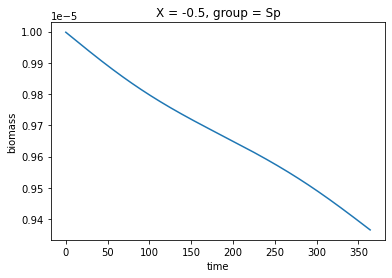

In [5]:
testcase.ds.biomass.sel(group="Sp").isel(X=0).plot()

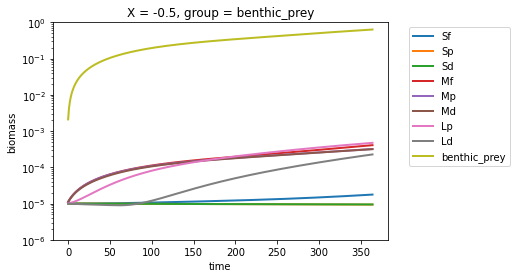

In [6]:
test_ds = testcase.ds.isel(X=0, time=0)
for group in test_ds.group.data:
    testcase.ds.biomass.sel(group=group).isel(X=0).plot(linewidth=2)
plt.ylim([1e-6, 1])
plt.yscale("log")
plt.legend(test_ds.group.data, bbox_to_anchor=(1.05, 1.0));